In [16]:
# Text preprocessing and standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from string import punctuation
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Modeling libraries
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.layers import Input, LSTM, Bidirectional


#Model Saving|
import pickle 

In [18]:
# Download packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siuuufuuu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/siuuufuuu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/siuuufuuu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/siuuufuuu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [20]:
# Read dataset
df = pd.read_csv("/Users/siuuufuuu/Desktop/dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/siuuufuuu/Desktop/dataset.csv'

In [22]:
# Initalize lemmatizer
wnl = WordNetLemmatizer()

# Initialize punctuation list
punctuation_list = list(punctuation)

# Manually adding punctuations 
additional_punctuation = ["''", "``","'s"] # Remove 's as we remove stop words
for i in additional_punctuation:
    punctuation_list.append(i)

# Define stopwords
stopwords_english = stopwords.words('english')

# Check if df is loaded properly
df.head()

NameError: name 'df' is not defined

In [24]:
# Print shape of the df
print(df.shape)

NameError: name 'df' is not defined

In [26]:
# Drop na, duplicate values and short comments if seen
df = df.dropna().drop_duplicates().reset_index(drop = True)
df.drop(df[df.Text.str.len() < 10].index, inplace=True)
df = df.reset_index(drop = True)
text = df['Text'].to_list()

# Print shape of the df after dropping
print(df.shape)

NameError: name 'df' is not defined

In [14]:
# Check class balance
sns.countplot(df, x = "Score")
plt.show()

NameError: name 'df' is not defined

In [28]:
def tokenization_customized(text):
    """
    Tokenizes and preprocesses a list of sentences
    """
    
    tokenized_text = [] #Initialize list to contain tokenized text

        # Check if the input is a single sentence (string)
    if isinstance(text, str):
        text = [text]  # Convert single sentence to a list for uniform processing
        
    for sent in range(len(text)):
        text[sent] = text[sent].lower() # Convert sentence to lowercase
        text[sent] = re.sub(r"\.{2,}", ".", text[sent]) # Handle special cases of multiple full stops
        text[sent] =re.sub(r"-", "", text[sent]) # Handle hypens
        text[sent] =re.sub(r"\.", " ", text[sent]) # Seperate fullstops to ensure correct tokenization
        temp_sent = word_tokenize(text[sent]) # Tokenize the sentence into words
        temp_word_list = [] # initialize empty list for each sentence
    
        # Filter out punctuation and stopwords using a loop
        for word in temp_sent:
            if word not in punctuation_list and word not in stopwords_english: # Remove both punc and stop words
                # Append the filtered words as a sublist to tokenized_text
                temp_word_list.append(word)

        
        # Append the list of filtered words as a sublist to tokenized_text
        tokenized_text.append(temp_word_list)
     # If the input was a single sentence, return the tokenized words directly (not as a nested list)
    if len(tokenized_text) == 1:
        return tokenized_text[0]
    else:    
        return tokenized_text


tokenized_text_wo_sw = tokenization_customized(text)
print(len(tokenized_text_wo_sw))

NameError: name 'text' is not defined

In [30]:
# Function to convert penn treebank pos tags to NLTK tags
def penn_to_wordnet(penn_pos_tag):
    tag_dictionary = {'NN':'n', 'JJ':'a','VB':'v', 'RB':'r'} 
    try:
    # Return first two characters of the Penn Treebank POS tags that are in the 'NLTK' tags
    # Only first two characters as word net doesnt distinguish between specific subcategories
        return tag_dictionary[penn_pos_tag[:2]]
    except:
        return 'n' # As Noun if no mapping avalable.

In [32]:
# Lemmatisation
def lemmatisation(corpus):    
    lemmatised_wo_sw = []

    if isinstance(corpus[0], str):  # If the first element is a string, it's a single sentence
        corpus = [corpus]  # Convert single sentence to a list for uniform processing
    
    for text in corpus:
        tagged_sent = pos_tag(text) # Create penn tagging 
        lemmatised_sent = [] # List for containing currently lemmatising list
        for word, tag in tagged_sent:
            lemmatised_sent.append(wnl.lemmatize(word, pos = penn_to_wordnet(tag))) # Run the function and lemmatise
        lemmatised_wo_sw.append(lemmatised_sent) # append currently lemmatising sentence to list
        
    if len(lemmatised_wo_sw) == 1:
        return lemmatised_wo_sw[0]
    else:
        return lemmatised_wo_sw


lemmatised_wo_sw = lemmatisation(tokenized_text_wo_sw)
print(len(lemmatised_wo_sw))

NameError: name 'tokenized_text_wo_sw' is not defined

In [34]:
# Check Output 
print(tokenized_text_wo_sw[12313])
print(lemmatised_wo_sw[12313])
print(df['Text'][12313])

NameError: name 'tokenized_text_wo_sw' is not defined

In [36]:
def group(text):
    # Join texts into string for TF-IDF later
    text_dataset_wo_sw = []
    if isinstance(text[0], str):  # If the first element is a string, it's a single sentence
        return [" ".join(text)]
    for i in range(len(text)):
        temp_text = " ".join(text[i])
        text_dataset_wo_sw.append(temp_text)
    return text_dataset_wo_sw
    
print(group(['love', 'necklace']))
text_dataset_wo_sw = group(lemmatised_wo_sw)
df['Text'] = text_dataset_wo_sw

['love necklace']


NameError: name 'lemmatised_wo_sw' is not defined

### Undersampling

In [14]:
# Random Undersampling 
rs = RandomUnderSampler(random_state=42, sampling_strategy = 'not minority')
print("Original Distribution:", Counter(df['Score']))
X_RS, y_RS = rs.fit_resample(df,df['Score'])
print("Original Distribution:", Counter(y_RS))
X_RS = X_RS['Text']

Original Distribution: Counter({5.0: 22463, 4.0: 8579, 3.0: 4126, 1.0: 3652, 2.0: 2685})
Original Distribution: Counter({1.0: 2685, 2.0: 2685, 3.0: 2685, 4.0: 2685, 5.0: 2685})


### Model building and training with undersampling

In [16]:
# Train test split for undersampled dataset
samples_train, samples_test, labels_train, labels_test = train_test_split(X_RS,
                                                                          y_RS,
                                                                          test_size=0.2,
                                                                          random_state=42)

In [17]:
def Plotting(labels_test,predicted_categories,title):
    """
    visualising the results using a confusion matrix heatmap and
    calculating key performance metrics
    """
    # Generate the confusion matrix
    mat = confusion_matrix(labels_test, predicted_categories)
    class_labels = '1', '2', '3','4','5'

    # Plot the confusion matrix as a heatmap
    sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title(title)
    plt.show()

    # Calculate performance metrics for the model
    performance_metrics = {
        "Accuracy": accuracy_score(labels_test, predicted_categories),
        "F1-score": f1_score(labels_test, predicted_categories, average='macro'),
        "Precision": precision_score(labels_test, predicted_categories, average='macro'),
        "Recall": recall_score(labels_test, predicted_categories, average='macro'),
        "Classification Report": classification_report(labels_test, predicted_categories)
    }


    #Print the metrics properly
    print("\nClassification Performance Metrics:")
    for metric, value in performance_metrics.items():
        # print individual metrics
        if metric != "Classification Report":
            print(f"{metric}:\t{value:.5f}")
        # Print the whole classification report
        else:
            print(f"\n{metric}:\n{value}")
    return performance_metrics

#### Naive bayes with undersampling

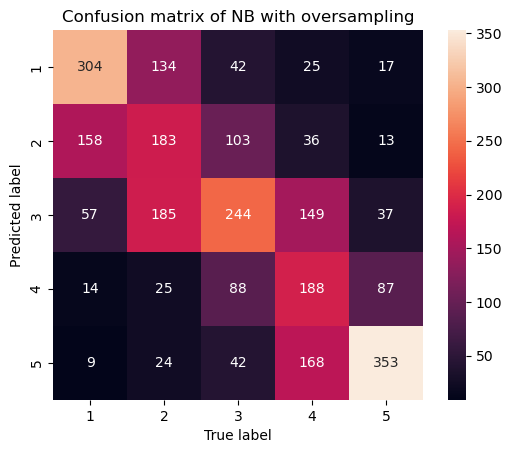


Classification Performance Metrics:
Accuracy:	0.47374
F1-score:	0.47205
Precision:	0.47532
Recall:	0.47831

Classification Report:
              precision    recall  f1-score   support

         1.0       0.58      0.56      0.57       542
         2.0       0.37      0.33      0.35       551
         3.0       0.36      0.47      0.41       519
         4.0       0.47      0.33      0.39       566
         5.0       0.59      0.70      0.64       507

    accuracy                           0.47      2685
   macro avg       0.48      0.48      0.47      2685
weighted avg       0.47      0.47      0.47      2685



In [19]:
# Build the Naive Bayes model by setting a pipeline where the input is first converted to TF-IDF vectors and then a Multinomial Naive Bayes is used
model_NB = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_NB.fit(samples_train, labels_train) # Fit the model on the training data
predicted_categories = model_NB.predict(samples_test) # Predict the categories of the test data

# Plot the confusion matrix
NB_result_os = Plotting(labels_test,predicted_categories,"Confusion matrix of NB with oversampling")

#### K nearest neighbours with undersampling

In [21]:
# Build kNN model with TF-IDF and kNN classifier like NB above
model_kNN = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=3))

# Parameter testing grid setup
param_grid = {
    'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9]  # number of neighbors used
}

# Cross fold CV (5 fold)
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Parameter testing setup
grid_search = GridSearchCV(estimator = model_kNN,
                             param_grid = param_grid,
                             scoring = 'accuracy',
                             cv = cv,
                             verbose = 1) # Display The process

grid_search.fit(samples_train, labels_train)  # Fit the model on the training data

best_model = grid_search.best_estimator_ # Save the best model

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Best cross-validated score
print("Best CV accuracy:", grid_search.best_score_)

# Test set performance
predicted_categories = grid_search.predict(samples_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'kneighborsclassifier__n_neighbors': 9}
Best CV accuracy: 0.35344506517690877


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


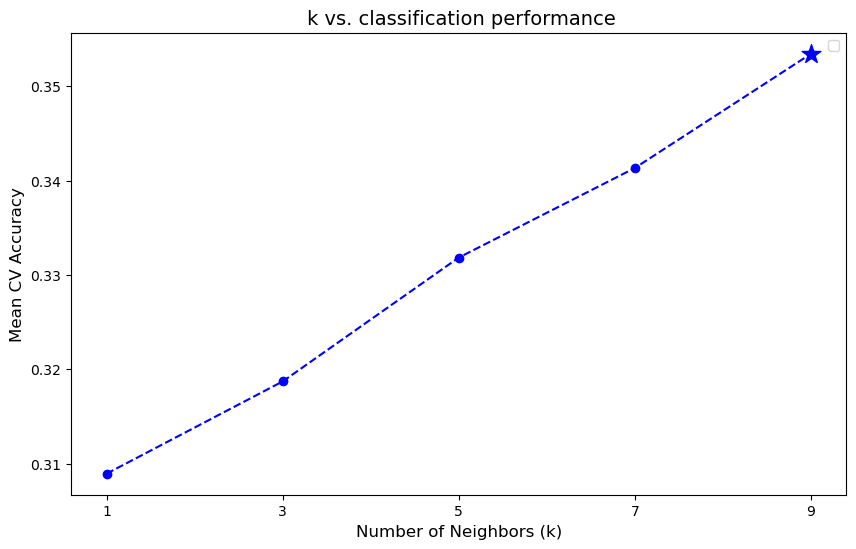

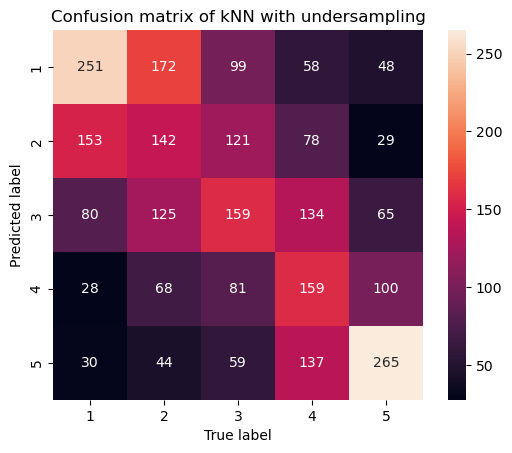


Classification Performance Metrics:
Accuracy:	0.36350
F1-score:	0.36268
Precision:	0.36272
Recall:	0.36615

Classification Report:
              precision    recall  f1-score   support

         1.0       0.40      0.46      0.43       542
         2.0       0.27      0.26      0.26       551
         3.0       0.28      0.31      0.29       519
         4.0       0.36      0.28      0.32       566
         5.0       0.50      0.52      0.51       507

    accuracy                           0.36      2685
   macro avg       0.36      0.37      0.36      2685
weighted avg       0.36      0.36      0.36      2685



In [22]:
# Extract results
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# Extract k values and sort them
all_k_values = []
for param in params:
    k = param['kneighborsclassifier__n_neighbors']
    all_k_values.append(k)
scores = mean_scores

# Pair each k with its corresponding accuracy score
k_and_scores = list(zip(all_k_values, mean_scores))

# Sort the pairs by k (smallest to largest)
sorted_pairs = sorted(k_and_scores, key=lambda x: x[0]) # Sort according to first element e.g (1,3,5,7,9)

# Separate the sorted pairs back into k and scores
k_sorted = [pair[0] for pair in sorted_pairs] # Extract k in sorted_pairs
scores_sorted = [pair[1] for pair in sorted_pairs] # Extract score in sorted_pairs

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_sorted, scores_sorted, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Mean CV Accuracy', fontsize=12)
plt.title(' k vs. classification performance', fontsize=14)
plt.xticks(k_sorted)
plt.legend()


# Highlight best k
best_k = grid_search.best_params_['kneighborsclassifier__n_neighbors']
best_score = grid_search.best_score_
plt.scatter(best_k, best_score, marker='*', s=200, color='blue', label=f'Best k={best_k}')
plt.show()

# Calculate accuracy
# Plot the confusion matrix
kNN_result_os = Plotting(labels_test,predicted_categories,"Confusion matrix of kNN with undersampling")

#### CNN with undersampling

In [24]:
# Constants
MAX_VOCABULARY_WORDS = 5000
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = 10

# Convert labels to numeric format
labels_train_CNN = np.array(labels_train - 1, dtype=np.int32)  # Ensure labels are int32
labels_test_CNN = np.array(labels_test - 1, dtype=np.int32)

# Create TextVectorization layer
vectorize_layer = TextVectorization(
    max_tokens=MAX_VOCABULARY_WORDS,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH
)

# Adapt vectorization layer to training data
vectorize_layer.adapt(samples_train)

In [25]:
# Define CNN model
CNN_model = Sequential(name="MyCNN")
CNN_model.add(Input(shape=(1,), dtype=tf.string))  # Input layer for raw text strings
CNN_model.add(vectorize_layer)                     # Tokenization and padding layer
CNN_model.add(Embedding(input_dim=MAX_VOCABULARY_WORDS, output_dim=EMBEDDING_DIM)) # Embedding layer to convert tokens into dense vector representations
CNN_model.add(Conv1D(filters=16, kernel_size=5, activation='relu')) # Convolutional layer 1 
CNN_model.add(Conv1D(filters=32, kernel_size=5, activation='relu')) # Convolutional layer 2
CNN_model.add(GlobalMaxPooling1D()) # Pooling layer to reduce the spatial dimensions
CNN_model.add(Dense(28, activation='relu'))
CNN_model.add(Dense(5, activation='softmax')) # softmax activation for multi-class classification

CNN_model.summary()

# Compile the model
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Manually split data into training and validation sets
split_index = int(len(samples_train) * 0.9)

samples_train_us = samples_train[:split_index]
labels_train_us = labels_train_CNN[:split_index]

samples_val = samples_train[split_index:]
labels_val = labels_train_CNN[split_index:]

# Create TensorFlow datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((samples_train_us, labels_train_us)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((samples_val, labels_val)).batch(32)

# Convert training data into TensorFlow dataset
test_dataset = tf.convert_to_tensor(samples_test, dtype=tf.string)

# Train the model using TensorFlow dataset
CNN_model.fit(train_dataset, epochs=5, validation_data = val_dataset)

Model: "MyCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 200)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 10)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 16)        │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 192, 32)        │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │           924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,477 (212.80 KB)

 Trainable params: 54,477 (212.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2036 - loss: 1.6034 - val_accuracy: 0.3380 - val_loss: 1.4438
Epoch 2/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3880 - loss: 1.3341 - val_accuracy: 0.4088 - val_loss: 1.2795
Epoch 3/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4823 - loss: 1.1531 - val_accuracy: 0.4609 - val_loss: 1.2641
Epoch 4/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5630 - loss: 1.0328 - val_accuracy: 0.4423 - val_loss: 1.3268
Epoch 5/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6127 - loss: 0.9369 - val_accuracy: 0.4292 - val_loss: 1.4328


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


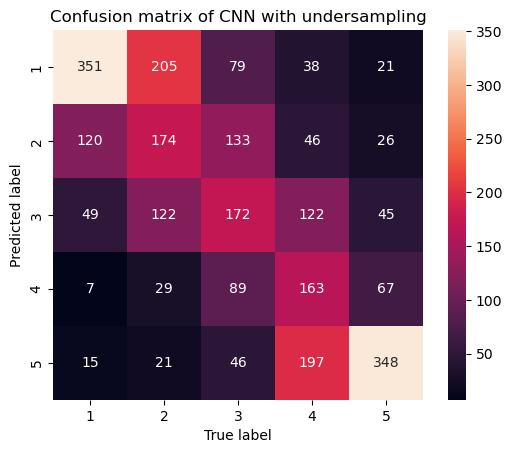


Classification Performance Metrics:
Accuracy:	0.44991
F1-score:	0.44028
Precision:	0.44118
Recall:	0.45383

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.65      0.57       542
           1       0.35      0.32      0.33       551
           2       0.34      0.33      0.33       519
           3       0.46      0.29      0.35       566
           4       0.56      0.69      0.61       507

    accuracy                           0.45      2685
   macro avg       0.44      0.45      0.44      2685
weighted avg       0.44      0.45      0.44      2685



In [26]:
# Predict probabilities for each class 
y_prob = CNN_model.predict(test_dataset)

# Get predicted class indices (0-4)
y_pred = np.argmax(y_prob, axis=1)

# Calculate accuracy
# Plot the confusion matrix
CNN_result_os = Plotting(labels_test_CNN,y_pred,"Confusion matrix of CNN with undersampling")

#### LSTM with undersampling

In [28]:
# Define the LSTM model
LSTM_model = Sequential(name="MyLSTM")
LSTM_model.add(Input(shape=(1,), dtype=tf.string)) # Input layer for raw text strings
LSTM_model.add(vectorize_layer) # vectorize_layer
LSTM_model.add(Embedding(input_dim=MAX_VOCABULARY_WORDS, # Same Size of the vocabulary as CNN
                  output_dim=EMBEDDING_DIM)) 
LSTM_model.add(Bidirectional(LSTM(16,return_sequences=True))) # Bidirectional LSTM layer with 16 units, returning sequences for further processing in the next layer
LSTM_model.add(Bidirectional(LSTM(32,dropout=0.2))) # Second Bidirectional LSTM layer with 32 units and dropout regularization (0.2) to prevent overfitting
LSTM_model.add(Dense(5, activation='softmax')) # softmax activation for multi-class classification
LSTM_model.summary() # Print model summary

# Compile the model
LSTM_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training 
LSTM_model.fit(train_dataset, epochs=5, batch_size=32, validation_data = val_dataset)

Model: "MyLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 200)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 200, 10)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200, 32)        │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,421 (275.08 KB)

 Trainable params: 70,421 (275.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.2519 - loss: 1.5297 - val_accuracy: 0.3873 - val_loss: 1.3050
Epoch 2/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.4219 - loss: 1.2450 - val_accuracy: 0.4320 - val_loss: 1.2830
Epoch 3/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.4760 - loss: 1.1582 - val_accuracy: 0.4264 - val_loss: 1.3116
Epoch 4/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.5076 - loss: 1.0955 - val_accuracy: 0.4385 - val_loss: 1.3127
Epoch 5/5
303/303 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.5524 - loss: 1.0410 - val_accuracy: 0.4227 - val_loss: 1.3645


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


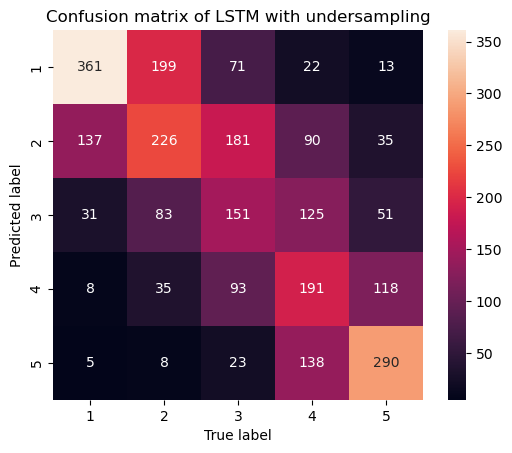


Classification Performance Metrics:
Accuracy:	0.45400
F1-score:	0.45158
Precision:	0.45530
Recall:	0.45532

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.67      0.60       542
           1       0.34      0.41      0.37       551
           2       0.34      0.29      0.31       519
           3       0.43      0.34      0.38       566
           4       0.62      0.57      0.60       507

    accuracy                           0.45      2685
   macro avg       0.46      0.46      0.45      2685
weighted avg       0.45      0.45      0.45      2685



In [29]:
# Predict probabilities for each class (shape: [num_samples, 5])
y_prob = LSTM_model.predict(test_dataset)

# Get predicted class indices (0-4)
y_pred = np.argmax(y_prob, axis=1)

# Calculate accuracy
# Plot the confusion matrix
LSTM_result_os = Plotting(labels_test_CNN,y_pred,"Confusion matrix of LSTM with undersampling")

### Models without undersampling

In [31]:
# Split data again as the data size is different when there are undersampling
samples_train_nous, samples_test_nous, labels_train_nous, labels_test_nous = train_test_split(df['Text'],
                                                                          df['Score'],
                                                                          test_size=0.2,
                                                                          random_state=42)

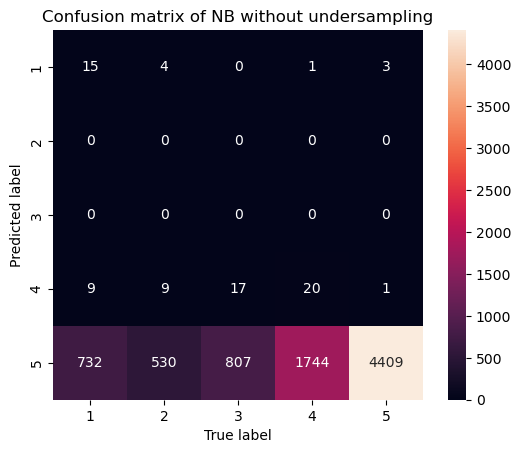


Classification Performance Metrics:
Accuracy:	0.53536
F1-score:	0.15168
Precision:	0.30911
Recall:	0.20605

Classification Report:
              precision    recall  f1-score   support

         1.0       0.65      0.02      0.04       756
         2.0       0.00      0.00      0.00       543
         3.0       0.00      0.00      0.00       824
         4.0       0.36      0.01      0.02      1765
         5.0       0.54      1.00      0.70      4413

    accuracy                           0.54      8301
   macro avg       0.31      0.21      0.15      8301
weighted avg       0.42      0.54      0.38      8301



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [32]:
# Build the Naive Bayes model by setting a pipeline where the input is first converted to TF-IDF vectors and then a Multinomial Naive Bayes is used
model_NB = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_NB.fit(samples_train_nous, labels_train_nous) # Train the model on the training data
predicted_categories = model_NB.predict(samples_test_nous) # Predict the categories of the test data

# Plot the confusion matrix
NB_result_no_us = Plotting(labels_test_nous,predicted_categories,"Confusion matrix of NB without undersampling")

In [33]:
# Save to file in the current working directory
pkl_filename = "pickle_model_NB_scorepred.pkl"
with open(pkl_filename, 'wb') as file: # Open file as binary file for writing (wb)
    pickle.dump(model_NB, file)

### KNN without undersampling

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'kneighborsclassifier__n_neighbors': 9}
Best CV accuracy: 0.5696300773036431


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


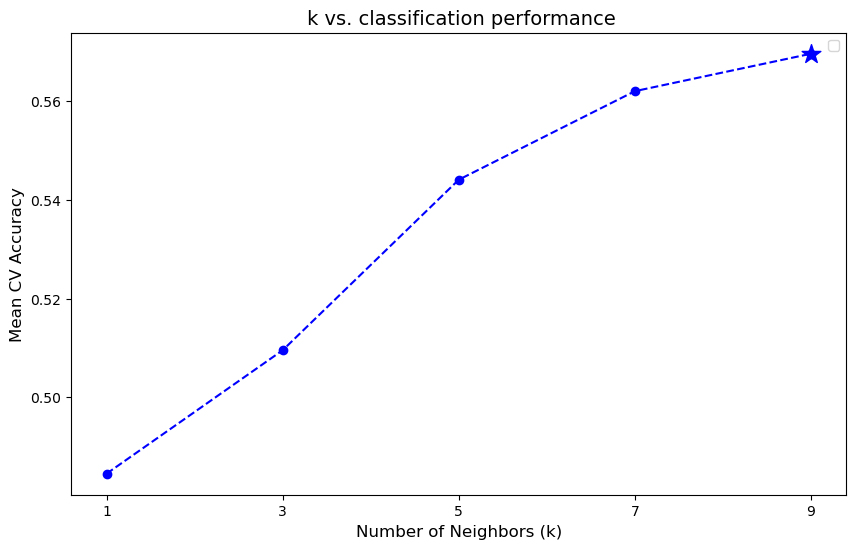

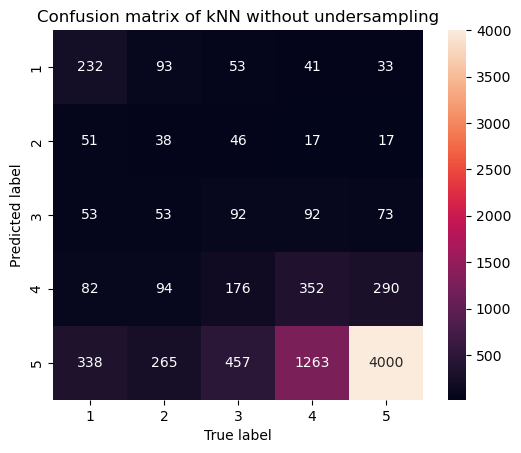


Classification Performance Metrics:
Accuracy:	0.56788
F1-score:	0.32924
Precision:	0.39566
Recall:	0.31887

Classification Report:
              precision    recall  f1-score   support

         1.0       0.51      0.31      0.38       756
         2.0       0.22      0.07      0.11       543
         3.0       0.25      0.11      0.16       824
         4.0       0.35      0.20      0.26      1765
         5.0       0.63      0.91      0.75      4413

    accuracy                           0.57      8301
   macro avg       0.40      0.32      0.33      8301
weighted avg       0.50      0.57      0.51      8301



In [35]:
# Build model pipeline with kNN and TF-IDF
model_kNN = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=3))

# Parameter testing grid setup
param_grid = {
    'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9]  # number of neighbors used
}

# Cross fold CV (5 fold)
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Parameter testing setup
grid_search = GridSearchCV(estimator = model_kNN,
                             param_grid = param_grid,
                             scoring = 'accuracy',
                             cv = cv,
                             verbose = 1) # Display The process

# Fit training data in the model
grid_search.fit(samples_train_nous, labels_train_nous)

# Save best model
best_model = grid_search.best_estimator_

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Best cross-validated score
print("Best CV accuracy:", grid_search.best_score_)

# Test set performance
predicted_categories = grid_search.predict(samples_test_nous)

# Extract results
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# Extract k values and sort them
all_k_values = []
for param in params:
    k = param['kneighborsclassifier__n_neighbors']
    all_k_values.append(k)
scores = mean_scores

# Pair each k with its corresponding accuracy score
k_and_scores = list(zip(all_k_values, mean_scores))

# Sort the pairs by k (smallest to largest)
sorted_pairs = sorted(k_and_scores, key=lambda x: x[0]) # Sort according to first element e.g (1,3,5,7,9)

# Separate the sorted pairs back into k and scores
k_sorted = [pair[0] for pair in sorted_pairs] # Extract k in sorted_pairs
scores_sorted = [pair[1] for pair in sorted_pairs] # Extract score in sorted_pairs

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_sorted, scores_sorted, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Mean CV Accuracy', fontsize=12)
plt.title(' k vs. classification performance', fontsize=14)
plt.xticks(k_sorted)
plt.legend()

# Highlight best k
best_k = grid_search.best_params_['kneighborsclassifier__n_neighbors']
best_score = grid_search.best_score_
plt.scatter(best_k, best_score, marker='*', s=200, color='blue', label=f'Best k={best_k}')
plt.show()

# Plot the confusion matrix
kNN_result_no_us = Plotting(labels_test_nous,predicted_categories,"Confusion matrix of kNN without undersampling")

In [36]:
# Save to file in the current working directory
pkl_filename = "pickle_model_kNN_scorepred.pkl"
with open(pkl_filename, 'wb') as file: # Open file as binary file for writing (wb)
    pickle.dump(grid_search, file)

### CNN without undersampling

Model: "MyCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 200)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 200, 10)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 196, 16)        │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 192, 32)        │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │           924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,477 (212.80 KB)

 Trainable params: 54,477 (212.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5578 - loss: 1.2117 - val_accuracy: 0.5902 - val_loss: 0.9768
Epoch 2/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6331 - loss: 0.9045 - val_accuracy: 0.6239 - val_loss: 0.9243
Epoch 3/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6734 - loss: 0.8128 - val_accuracy: 0.6260 - val_loss: 0.9363
Epoch 4/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6952 - loss: 0.7572 - val_accuracy: 0.6227 - val_loss: 0.9599
Epoch 5/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7173 - loss: 0.7096 - val_accuracy: 0.6110 - val_loss: 1.0004
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step


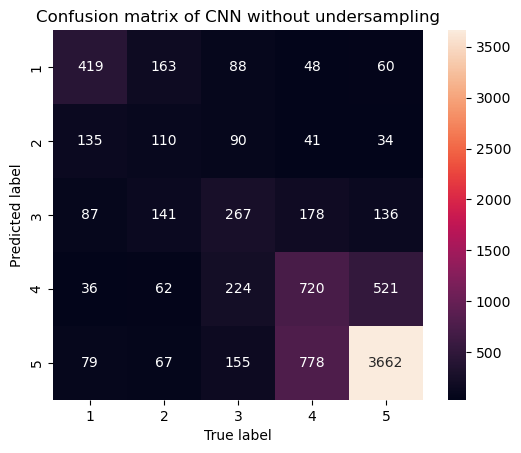


Classification Performance Metrics:
Accuracy:	0.62378
F1-score:	0.46738
Precision:	0.47399
Recall:	0.46372

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       756
           1       0.27      0.20      0.23       543
           2       0.33      0.32      0.33       824
           3       0.46      0.41      0.43      1765
           4       0.77      0.83      0.80      4413

    accuracy                           0.62      8301
   macro avg       0.47      0.46      0.47      8301
weighted avg       0.61      0.62      0.61      8301



In [38]:
# Constants
MAX_VOCABULARY_WORDS = 5000
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = 10

# Convert labels to numeric format
labels_train_CNN = np.array(labels_train_nous - 1, dtype=np.int32)  # Ensure labels are int32
labels_test_CNN = np.array(labels_test_nous - 1, dtype=np.int32)

# Create TextVectorization layer
vectorize_layer = TextVectorization(
    max_tokens=MAX_VOCABULARY_WORDS,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH
)

# Adapt vectorization layer to training data
vectorize_layer.adapt(samples_train_nous)

# Define CNN model
CNN_model = Sequential(name="MyCNN")
CNN_model.add(Input(shape=(1,), dtype=tf.string))  # Input layer for raw text strings
CNN_model.add(vectorize_layer)                     # Tokenization and padding layer
CNN_model.add(Embedding(input_dim=MAX_VOCABULARY_WORDS, output_dim=EMBEDDING_DIM)) # Embedding layer to convert tokens into dense vector representations
CNN_model.add(Conv1D(filters=16, kernel_size=5, activation='relu')) # Convolutional layer 1 
CNN_model.add(Conv1D(filters=32, kernel_size=5, activation='relu')) # Convolutional layer 2
CNN_model.add(GlobalMaxPooling1D()) # Pooling layer to reduce the spatial dimensions
CNN_model.add(Dense(28, activation='relu'))
CNN_model.add(Dense(5, activation='softmax')) # softmax activation for multi-class classification
CNN_model.summary()

# Compile the model
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Manually split data into training and validation sets
split_index = int(len(samples_train_nous) * 0.9)

samples_train = samples_train_nous[:split_index]
labels_train = labels_train_CNN[:split_index]

samples_val = samples_train_nous[split_index:]
labels_val = labels_train_CNN[split_index:]

# Create TensorFlow datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((samples_train, labels_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((samples_val, labels_val)).batch(32)

# Convert training data into TensorFlow dataset
test_dataset = tf.convert_to_tensor(samples_test_nous, dtype=tf.string)

# Train the model using TensorFlow dataset
CNN_model.fit(train_dataset, epochs=5, validation_data = val_dataset)

# Predict probabilities for each class
y_prob = CNN_model.predict(test_dataset)

# Get predicted class indices (0-4)
y_pred = np.argmax(y_prob, axis=1)


# Calculate accuracy
# Plot the confusion matrix
CNN_result_no_us = Plotting(labels_test_CNN,y_pred,"Confusion matrix of CNN without undersampling")

In [39]:
# Save to file in the current working directory
pkl_filename = "pickle_model_CNN_scorepred.pkl"
with open(pkl_filename, 'wb') as file: # Open file as binary file for writing (wb)
    pickle.dump(CNN_model, file)

### LSTM without stopwords

Model: "MyLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 200)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, 200, 10)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 200, 32)        │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,421 (275.08 KB)

 Trainable params: 70,421 (275.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 72s 75ms/step - accuracy: 0.5677 - loss: 1.1499 - val_accuracy: 0.5962 - val_loss: 0.9635
Epoch 2/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 75s 81ms/step - accuracy: 0.6307 - loss: 0.9000 - val_accuracy: 0.6191 - val_loss: 0.9254
Epoch 3/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.6656 - loss: 0.8280 - val_accuracy: 0.6224 - val_loss: 0.9102
Epoch 4/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.6860 - loss: 0.7802 - val_accuracy: 0.6149 - val_loss: 0.9274
Epoch 5/5
934/934 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.7023 - loss: 0.7519 - val_accuracy: 0.6052 - val_loss: 0.9433
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


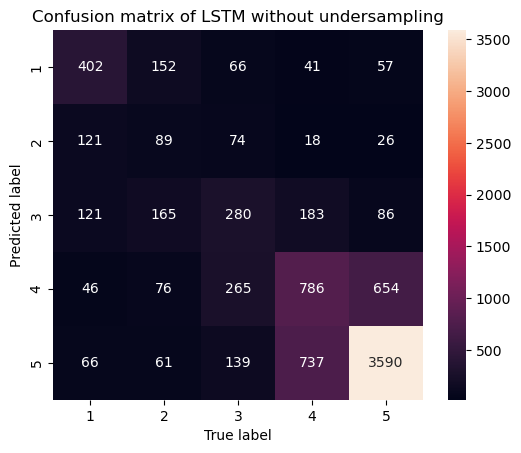


Classification Performance Metrics:
Accuracy:	0.62005
F1-score:	0.46445
Precision:	0.47568
Recall:	0.45886

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       756
           1       0.27      0.16      0.20       543
           2       0.34      0.34      0.34       824
           3       0.43      0.45      0.44      1765
           4       0.78      0.81      0.80      4413

    accuracy                           0.62      8301
   macro avg       0.48      0.46      0.46      8301
weighted avg       0.61      0.62      0.61      8301



In [41]:

# Define the LSTM model
LSTM_model = Sequential(name="MyLSTM")
LSTM_model.add(Input(shape=(1,), dtype=tf.string)) # Input layer for raw text strings
LSTM_model.add(vectorize_layer) # vectorize_layer
LSTM_model.add(Embedding(input_dim=MAX_VOCABULARY_WORDS, # Same Size of the vocabulary as CNN
                  output_dim=EMBEDDING_DIM)) 
LSTM_model.add(Bidirectional(LSTM(16,return_sequences=True))) # Bidirectional LSTM layer with 16 units, returning sequences for further processing in the next layer
LSTM_model.add(Bidirectional(LSTM(32,dropout=0.2))) # Second Bidirectional LSTM layer with 32 units and dropout regularization (0.2) to prevent overfitting
LSTM_model.add(Dense(5, activation='softmax')) # softmax activation for multi-class classification
LSTM_model.summary() # Print model summary

LSTM_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
LSTM_model.fit(train_dataset, epochs=5, batch_size=32, validation_data = val_dataset)

# Predict probabilities for each class (shape: [num_samples, 5])
y_prob = LSTM_model.predict(test_dataset)

# Get predicted class indices (0-4)
y_pred = np.argmax(y_prob, axis=1)


# Calculate accuracy
# Plot the confusion matrix
LSTM_result_no_us = Plotting(labels_test_CNN,y_pred,"Confusion matrix of LSTM without undersampling")

In [42]:
# Save to file in the current working directory
pkl_filename = "pickle_model_LSTM_scorepred.pkl"
with open(pkl_filename, 'wb') as file: # Open file as binary file for writing (wb)
    pickle.dump(LSTM_model, file)

### Naive Bayes scoring

(8301,)


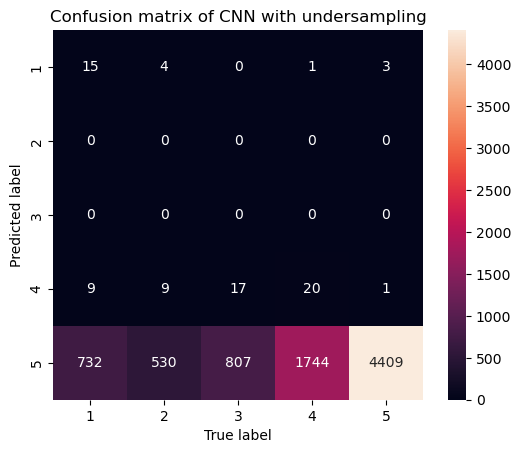


Classification Performance Metrics:
Accuracy:	0.53536
F1-score:	0.15168
Precision:	0.30911
Recall:	0.20605

Classification Report:
              precision    recall  f1-score   support

         1.0       0.65      0.02      0.04       756
         2.0       0.00      0.00      0.00       543
         3.0       0.00      0.00      0.00       824
         4.0       0.36      0.01      0.02      1765
         5.0       0.54      1.00      0.70      4413

    accuracy                           0.54      8301
   macro avg       0.31      0.21      0.15      8301
weighted avg       0.42      0.54      0.38      8301



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [44]:
with open("pickle_model_NB_scorepred.pkl", 'rb') as file:
    pickle_model_NB = pickle.load(file)
# Use loaded model
predicted_NB = pickle_model_NB.predict(samples_test_nous)
print(predicted_NB.shape)
# Plot the confusion matrix
Temp = Plotting(labels_test_nous,predicted_NB,"Confusion matrix of CNN with undersampling")

### KNN scoring

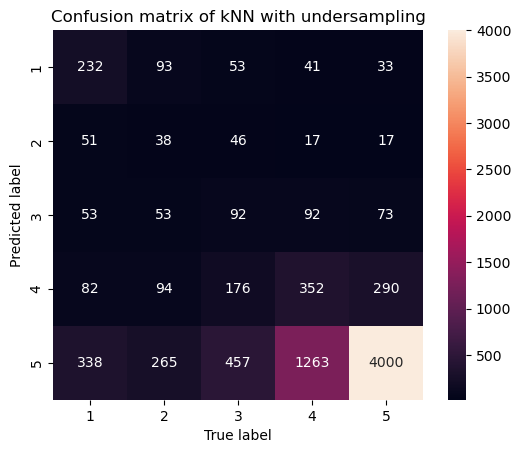


Classification Performance Metrics:
Accuracy:	0.56788
F1-score:	0.32924
Precision:	0.39566
Recall:	0.31887

Classification Report:
              precision    recall  f1-score   support

         1.0       0.51      0.31      0.38       756
         2.0       0.22      0.07      0.11       543
         3.0       0.25      0.11      0.16       824
         4.0       0.35      0.20      0.26      1765
         5.0       0.63      0.91      0.75      4413

    accuracy                           0.57      8301
   macro avg       0.40      0.32      0.33      8301
weighted avg       0.50      0.57      0.51      8301



In [46]:
with open("pickle_model_kNN_scorepred.pkl", 'rb') as file: 
    pickle_model_kNN = pickle.load(file)
# Use loaded model
predicted_kNN = pickle_model_kNN.predict(samples_test_nous)
# Plot the confusion matrix
Temp = Plotting(labels_test_nous,predicted_kNN,"Confusion matrix of kNN with undersampling")

### CNN scoring

260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step


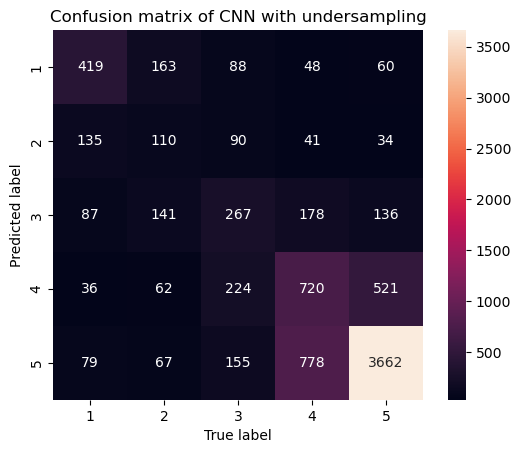


Classification Performance Metrics:
Accuracy:	0.62378
F1-score:	0.46738
Precision:	0.47399
Recall:	0.46372

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       756
           1       0.27      0.20      0.23       543
           2       0.33      0.32      0.33       824
           3       0.46      0.41      0.43      1765
           4       0.77      0.83      0.80      4413

    accuracy                           0.62      8301
   macro avg       0.47      0.46      0.47      8301
weighted avg       0.61      0.62      0.61      8301



In [48]:
with open("pickle_model_CNN_scorepred.pkl", 'rb') as file: 
    pickle_model_CNN = pickle.load(file)
# Use loaded model
predicted_prob_cNN = pickle_model_CNN.predict(test_dataset)
y_pred_CNN = np.argmax(predicted_prob_cNN, axis=1)
# Plot the confusion matrix
Temp = Plotting(labels_test_CNN,y_pred_CNN,"Confusion matrix of CNN with undersampling")

### LSTM Scoring

260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


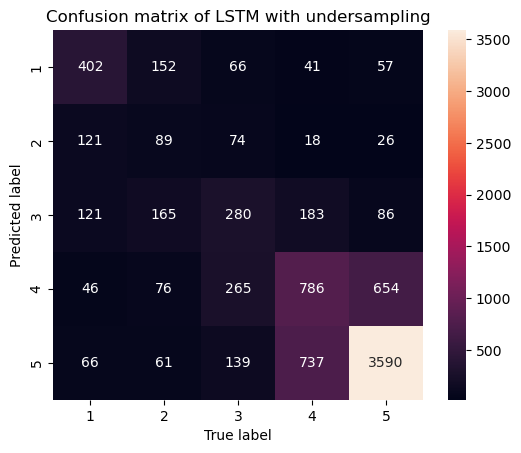


Classification Performance Metrics:
Accuracy:	0.62005
F1-score:	0.46445
Precision:	0.47568
Recall:	0.45886

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       756
           1       0.27      0.16      0.20       543
           2       0.34      0.34      0.34       824
           3       0.43      0.45      0.44      1765
           4       0.78      0.81      0.80      4413

    accuracy                           0.62      8301
   macro avg       0.48      0.46      0.46      8301
weighted avg       0.61      0.62      0.61      8301



In [50]:
with open("pickle_model_LSTM_scorepred.pkl", 'rb') as file: # Open file as binary file for reading
    pickle_model_LSTM = pickle.load(file)
# Use loaded model
predicted_prob_LSTM = pickle_model_LSTM.predict(test_dataset)
y_pred_LSTM = np.argmax(predicted_prob_LSTM, axis=1)
# Plot the confusion matrix
Temp = Plotting(labels_test_CNN,y_pred_LSTM,"Confusion matrix of LSTM with undersampling")

### Integration into one function

In [43]:
def predict_product_rating(text,model):
    """
    Predicts product ratings using a pre-trained model.

    Parameters:
        text (list): A list of input sentences for prediction.
        model (str): The name of the pre-trained model file.

    Returns:
        list: Predicted ratings for each input sentence.
    """
    
    # Load the pre-trained model from a pickle file
    model_pkg = model + ".pkl"
    with open(model_pkg, 'rb') as file:
        pickle_model = pickle.load(file)

    # Text pre-processing
    text_tokenized = tokenization_customized(text)
    text_tokenized_lem = lemmatisation(text_tokenized)
    text_grouped = group(text_tokenized_lem)

    # Check if the loaded model is a neural network
    if isinstance(pickle_model, tf.keras.Model):  # TensorFlow/Keras Model
        print("Detected Neural Network Model")
        
        # Convert grouped text into TensorFlow tensors
        test_dataset = tf.convert_to_tensor(text_grouped, dtype=tf.string)
        pred = pickle_model.predict(test_dataset) # Predict probabilities or scores
        pred_class = np.argmax(pred, axis=1) # Get the class with the highest probabilities
        
        # Print predictions for each sentence along with their scores
        for i in range(len(text)):
            print(f"{text[i]} : Score : {pred_class[i] + 1}")
        return pred_class + 1 # Return score
        
    else: # Traditional Machine Learning Model
        pred = pickle_model.predict(text_grouped) # Perform predictions using the ML model
        for i in range(len(text)):
            print(f"{text[i]} : Score : {pred[i]}") # Print predictions
        return pred # Return score
 

# Example usage
sentences = ["This necklace is not bad, it suits me a lot but its quite expensive"]
pred_result = predict_product_rating(sentences,"pickle_model_LSTM_scorepred")

Detected Neural Network Model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
this necklace is not bad, it suits me a lot but its quite expensive : Score : 4



Dataset

In thprojectent, the target is to predict customers ratings based on the comments. Four supervised machine learning methods are used : naïve bayes, k-Nearest neighbour, convolutional neural network, and Long-Short term network. 
We first look at the class distribution, which appears to be skewed towards higher ratings, with observations for the highest score (rating 5) exceed all other scorings combined, which suggests high class imbalances in this dataset.

Dara pre-processing

Then, we pre-process dataset to ensure compatibility when modelling.
In the dataset, substantial number of duplicates and missing values are discovered, these duplicates were removed as their presence would distort the distribution and might introduce biases to the model.
Similarly, NULL values are removed. For comment column, imputing meaningful text is impractical because of the difficulties in generating meaningful text replacements. For class labels, two methods for imputation are considered, first is mean imputation, but it’s not feasible as under-represented class will become more underrepresented due to this algorithm favours frequent values. Second is multiple imputation, it’s also not feasible as it requires other variables to be numeric or categorical. Ultimately, all NULL values were removed to ensure a more representative dataset.
Then tokenization is performed, which include removal of stop words and punctuations, followed by lemmatisation. As stop words and punctuations carries little sentimental meaning, excluding them saves computational complexity without compromising accuracy. Regex patterns are also used to split grouped or repetitive full stops and hyphens. Then NLTK's tokenizer was used in word tokenization as it's straight-forward and have lower computationally cost comparing to BERT tokenizer. After that, stop words and punctuations are removed using NLTK's predefined stop word list and punctuation list with manually added punctuations specific to the dataset. This ensured that only meaningful tokens remained for analysis.

Model building
Before splitting the dataset, a version that utilizes under sampling is created to address class imbalance. The common practice to deal with class imbalance is by oversampling and generate synthetic observations, as it preserves valuable data, but due to the difficulties in generating such data, it's not feasible. 
Given the limited availability of under sampling technique aimed toward NLP , random under sampling was used, which refers to randomly dropping rows of the majority class to balance the class distribution.
Then dataset is split in to 80% training and 20% testing, following the common practice among the industry, it ensures effective learning with 80% data and reducing overfitting risk while having a large enough portion (20%) for generalization testing. 
First model implemented was Naïve Bayes, this model learns conditional probabilities between word and labels, like using the probability of “pretty” given the class label 5 to predict, it has an assumption that each word in the text column to be independent given the Scoring label. For example, the percentage of “Pretty” appearing is assumed to be independent with the word “necklace”, its often not the truth but it’s works well as a baseline model. Before feeding into the model, TF-IDF vectorizer is used to convert tokenized text into matrix of frequencies where vocabulary is the column and comments as the row, which enable the model to learn which words are important for which rating. The advantage of using this model is simplicity, as it provides a decent accuracy for an easily trained algorithm, which can be a baseline model for future models. Also, each word in the vocabulary list has an explicit probability for each class, offering high explainability, users can see how individual words contribute to predictions.
Second model is the k-Nearest Neighbours classifier. which predict ratings with Euclidean distance between the target comment vector and other comment vectors, the closest k neighbours are chosen and use majority voting to determine the class. Same as Bayes classifier, it needs a TF-IDF matrix to represent the vector of a comment. As K (number of neighbours) is an important parameter (too large reduce precision and too small will introduce noise), cross validation will be performed using different K-values to determine the best model. The strength of this model is the time savings in training, as the training done in prediction process, traditional training process are not needed.
Third model is Convolutional neural Network,  it uses a sliding window like algorithm to capture local patterns of the texts, then reducing size using pooling while capturing significant information, which is then fed to dense layers and output layer. Convolutions outperform other models because of the ability to capture local patterns. Other models treat each word individually, but CNN uses windows to detect pattern of consecutive words like “good servicing quality”. Custom embedding will be trained as it could capture domain and task specific representations better than loaded embeddings. Yet the drawback is the need of higher computational power in train the embedding.
Last model is Long Short-Term Memory Network, differ from CNN’s N gram like model, it’s designed to capture long-term dependencies in text by maintaining a memory of past information. LSTM uses forget, input, and output gates to manage important information, discarding irrelevant data, while storing context in a hidden state. For example, even the words like “bad quality” is far apart, the model will still capture the relationship between them. Same as CNN, we will train a custom embedding for better fit for the task. The drawback is that the computational complexity is higher than CNN as LSTM must be processed sequentially where CNN can process in parallel.
For both neural networks, I used the same embedding structure, limiting max vocabulary words to 5000, max sequence length of 200 and embedding dimension of 10, which refers to having 5000 unique words in the embedding, each comment or review is truncated or padded to a maximum of 200 words. And dimension of each word be 10. Limiting structures and sizes of embedding reduce computational complexity extra information that have minimal use for predictions can be discarded.
For activation function, I decided to use ReLU, as ReLU in a multi-class setup provides a better convergence in gradient decent algorithms. (1)
For optimization and loss function algorithm, I have chosen Adam (Adaptive Moment Estimation) as it can utilizes moments in gradient to have a faster convergence, and cross entropy loss as it is standard in classification tasks .
Epoch Is set to be 5 as after parameter testing, this is to ensure a balance between accuracy and avoid overfitting, as after 5 epochs, the model will start to overfit and shows discrepancy between train accuracy and test accuracy.
Performance evaluation

For performance and results, all four models are evaluated under two cases: with under sampling and without under sampling. The performance of under sampled model is poor, with all 4 models having accuracy and F1 scores below 50%, so all models with under sampling were discarded and we will focus on the original dataset. 
For naïve bayes, although it has an accuracy of 54%, the F1 metric is very low (0.15), indicates the model performs badly in both precision and recall, this suggests that the model struggles to make balanced predictions across all classes, likely due to class imbalance in the dataset. Confusion matrix also supports this claim, as we can tell the model favour class 5, neglecting other classes and shows a bias toward majority of classes.
For kNN, the accuracy is higher than naïve bayes by 3%, also F1 score (0.32) is a double of Naïve Bayes’ score, which indicates an improvement in handling class imbalance. Also, cross reveals k = 9 have the highest mean CV accuracy. Also, the confusion matrix reveals that kNN successfully made predictions for Class 2, a class that was completely ignored by Naive Bayes. This suggests that kNN is better in solving class imbalance. However, its performance remains below expectations, so further testing with other models will be necessary.
For both neural networks, the result increased with a 6% improvement in accuracy, LSTM and CNN having similar accuracy (0.63), which is a good result considering the more classes, the harder the prediction. The F1 score also increased, with F1 score of 0.44 in CNN and 0.46 in LSTM, the higher score implies a better handling in class balances. The confusion matrix also shows a diverse prediction along with higher F1 score for class one. This suggests the models are learning to distribute predictions evenly across all classes.


Results, limitations and improvements

Combining all the information, I would choose CNN as the best model, although it has lower F1 score comparing to LSTM, it provides a lower computational complexity, which makes up for the F1 score difference, also because comments are straightforward short texts, such that the advantage of long-term dependency in LSTM might not be utilized. 
For limitations, despite efforts like under sampling, models still favor the majority class, affecting overall performance. Collecting more real-life data could help balance predictions across classes.
Another limitation is the model used, CNN and LSTM traditional NLP methods, comparing modern models like BERT, they might get outperformed, such that employing recent model structure might help with accuracy.



Reference 

1. Bos, T., & Schmidt-Hieber, J. (2022). Convergence rates of deep ReLU networks for multiclass classification. Electronic Journal of Statistics, 16(1), 2724-2773.
p with the accuracy.
